# Differential analysis

This notebook shows how to create a differential analysis based on two CombObj's (A and B) from two different cell types.

In [1]:
import tfcomb.objects

## Prepare GM12878 CombObj

In [2]:
A = tfcomb.objects.CombObj(verbosity=0)
A.prefix = "GM12878"
A.TFBS_from_motifs(regions = "../data/GM12878_enhancers_chr1.bed", 
                   motifs = "../data/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome = "../data/hg38_chr1.fa.gz", 
                   threads = 4)
A.count_within()
A.market_basket()

## Prepare CD4+ CombObj

In [3]:
B = tfcomb.objects.CombObj(verbosity=0)
B.prefix = "CD4+"
B.TFBS_from_motifs(regions = "../data/CD4+_enhancers_chr1.bed", 
                   motifs = "../data/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome = "../data/hg38_chr1.fa.gz", 
                   threads = 4)
B.count_within()
B.market_basket()

## Compare two CombObj's

In [4]:
compare_obj = A.compare(B)

/home/mbentse/.local/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
compare_obj.rules

,TF1,TF2,GM12878_confidence,GM12878_lift,GM12878_cosine,CD4+_confidence,CD4+_lift,CD4+_cosine,GM12878_cosine_norm,CD4+_cosine_norm,GM12878_CD4+_cosine_log2fc,GM12878_CD4+_cosine_pvalue
90791,ZNF502,ZNF502,0.069971,36.902583,0.069971,5.563559,920.674770,5.563559,0.067648,3.407892,-2.045653,2.299075e-08
38990,ZNF502,ZNF214,0.119534,59.404879,0.116034,5.313559,1061.461615,5.838055,0.117982,3.602976,-2.041670,1.430282e-08
38991,ZNF214,ZNF502,0.112637,59.404879,0.116034,6.414322,1061.461615,5.838055,0.117982,3.602976,-2.041670,1.430282e-08
10922,POU2F1,ZNF502,0.178174,93.968716,0.203854,6.269767,1037.540244,5.984318,0.222439,3.769120,-1.963961,5.105422e-08
10921,ZNF502,POU2F1,0.233236,93.968716,0.203854,5.711864,1037.540244,5.984318,0.222439,3.769120,-1.963961,5.105422e-08
...,...,...,...,...,...,...,...,...,...,...,...,...
6,ZNF467,VEZF1,1.226676,153.885724,1.228801,1.440237,133.762196,1.443658,3.348656,1.079427,1.064383,7.406184e-17
26,ZNF770,PAX5,0.796498,136.573338,1.127219,0.648871,121.248774,0.990489,2.823773,0.773814,1.108142,1.063118e-26
27,PAX5,ZNF770,1.595261,136.573338,1.127219,1.511962,121.248774,0.990489,2.823773,0.773814,1.108142,1.063118e-26
28,ZNF770,ZNF121,0.816848,132.763868,1.125495,0.581109,118.509787,0.926697,2.800936,0.734709,1.131661,2.203518e-28


## Plot differential co-occurring TFs

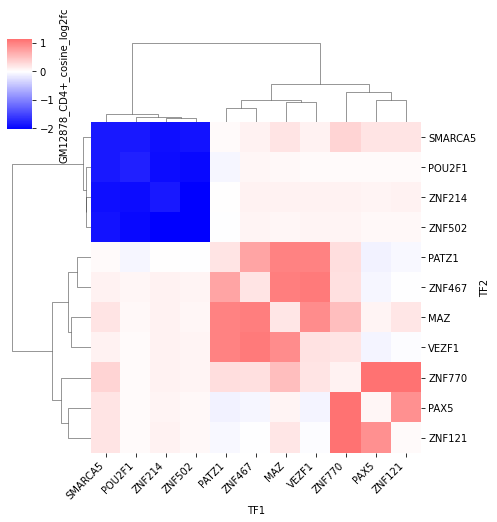

In [6]:
compare_obj.plot_heatmap(color_by="GM12878_CD4+_cosine_log2fc")

In [7]:
compare_obj.plot_network(contrast=("GM12878", "CD4+"), 
                         measure="cosine", 
                         engine="dot", 
                         color_edge_by="GM12878_CD4+_cosine_log2fc")

/home/mbentse/.local/lib/python3.7/site-packages/scipy/stats/stats.py:5996: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp


{}


TypeError: expected string or bytes-like object